
HuggingFace Datasets

HuggingFace - платформа для работы с моделями с архитектурой Transformer для обработки текстов и не только!

Datasets дает доступ к коллекциям данных и позволяет создавать свои наборы для машинного обучения.

pip install - команда shell для загрузки библиотеки

-q - параметр "quiet", не выводит не экран подробную информацию о процессе загрузки библиотеки

! - символ для объявления shell-команд


In [1]:
pip install datasets

In [2]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [3]:
from datasets import load_dataset

dataset = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")

In [4]:
# Какие метки есть в датасете?(?????)

unique_labels = set() # Создаем множество set() # Множество - это список уникальных элементов
for i in dataset['train']: # Для каждого уникального элемента из обучающей выборки dataset['train']. Добавим элемент в множество unique_labels.
    unique_labels.add(i['sentiment'])
unique_labels

{'negative', 'neutral', 'positive'}

In [5]:
train_len = len(dataset['train']['sentiment'])
validation_len = len(dataset['validation']['sentiment'])
test_len = len(dataset['test']['sentiment'])

negative_counter = {'train':0, 'validation': 0, 'test':0 }
positive_counter = {'train':0, 'validation': 0, 'test':0}
neutral_counter = {'train':0, 'validation': 0, 'test':0} 

negative_rates = {'train':0, 'validation': 0, 'test':0 }
positive_rates = {'train':0, 'validation': 0, 'test':0}
neutral_rates = {'train':0, 'validation': 0, 'test':0}

def count_set_sentiment(set_name):
    for i in range(len(dataset[set_name]['sentiment'])): 
        if dataset[set_name][i]['sentiment'] == 'negative': 
            negative_counter[set_name] += 1
        if dataset[set_name][i]['sentiment'] == 'positive':
            positive_counter[set_name] += 1
        if dataset[set_name][i]['sentiment'] == 'neutral':
            neutral_counter[set_name] += 1

def count_rates_of_set(set_name):
    set_len = len(dataset[set_name]['sentiment'])
    
    negative_rates[set_name] = round(negative_counter[set_name]/ set_len,2) * 100
    positive_rates[set_name] = round(positive_counter[set_name]/ set_len,2) * 100
    neutral_rates[set_name] = round(neutral_counter[set_name]/ set_len,2) * 100



count_set_sentiment('train')
count_rates_of_set('train')

count_set_sentiment('validation')
count_rates_of_set('validation')

count_set_sentiment('test')
count_rates_of_set('test')
print()
print(f'Длина тренировочного датасета: {train_len}') 
print(f'Длина проверочного датасета: {validation_len}')
print(f'Длина тестового датасета: {test_len}')

print('Данные обучающей выборки')
print(f'Положительные метки: {positive_counter['train']} единиц')
print(f'Отрицательне метки: {negative_counter['train']} единиц')
print(f'Нейтральные метки: {neutral_counter['train']} единиц')
print(f'Положительные метки составляют: {int(positive_rates['train'])} % обучающей выборки')
print(f'Отрицательные метки составляют: {int(negative_rates['train'])} % обучающей выборки')
print(f'Нейтральные метки составляют: {int(neutral_rates['train'])} % обучающей выборки')

print()

print('Данные проверочной выборки')
print(f'Положительные метки: {positive_counter['validation']} единиц')
print(f'Отрицательне метки: {negative_counter['validation']} единиц')
print(f'Нейтральные метки: {neutral_counter['validation']} единиц')
print(f'Положительные метки составляют: {int(positive_rates['validation'])} % проверочной выборки')
print(f'Отрицательные метки составляют: {int(negative_rates['validation'])} % проверочной выборки')
print(f'Нейтральные метки составляют: {int(neutral_rates['validation'])} % проверочной выборки')

print()

print('Данные тестовой выборки')
print(f'Положительные метки: {positive_counter['test']} единиц')
print(f'Отрицательне метки: {negative_counter['test']} единиц')
print(f'Нейтральные метки: {neutral_counter['test']} единиц')
print(f'Положительные метки составляют: {int(positive_rates['test'])} % проверочной выборки')
print(f'Отрицательные метки составляют: {int(negative_rates['test'])} % проверочной выборки')
print(f'Нейтральные метки составляют: {int(neutral_rates['test'])} % проверочной выборки')


Длина тренировочного датасета: 31232
Длина проверочного датасета: 5205
Длина тестового датасета: 5206
Данные обучающей выборки
Положительные метки: 10478 единиц
Отрицательне метки: 9105 единиц
Нейтральные метки: 11649 единиц
Положительные метки составляют: 34 % обучающей выборки
Отрицательные метки составляют: 28 % обучающей выборки
Нейтральные метки составляют: 37 % обучающей выборки

Данные проверочной выборки
Положительные метки: 1760 единиц
Отрицательне метки: 1517 единиц
Нейтральные метки: 1928 единиц
Положительные метки составляют: 34 % проверочной выборки
Отрицательные метки составляют: 28 % проверочной выборки
Нейтральные метки составляют: 37 % проверочной выборки

Данные тестовой выборки
Положительные метки: 1730 единиц
Отрицательне метки: 1546 единиц
Нейтральные метки: 1930 единиц
Положительные метки составляют: 33 % проверочной выборки
Отрицательные метки составляют: 30 % проверочной выборки
Нейтральные метки составляют: 37 % проверочной выборки


График тренировочной выборки


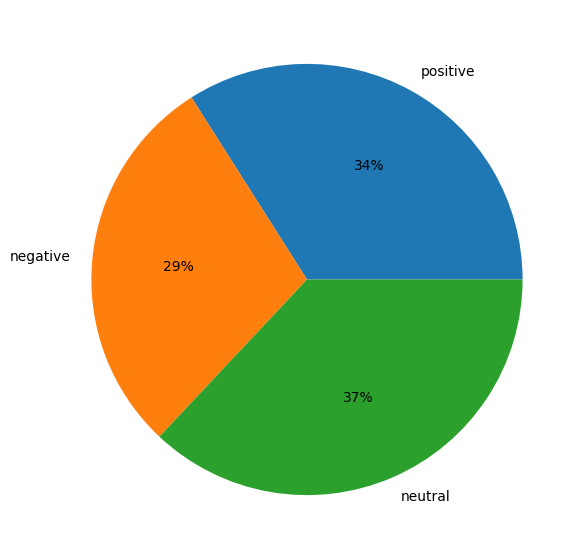

График проверочной  выборки


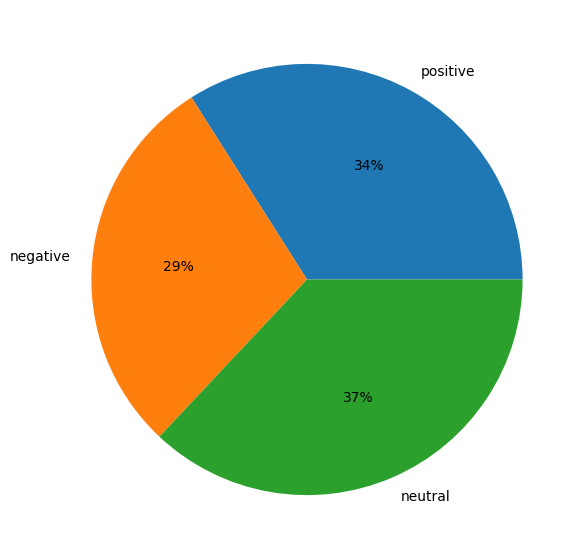

График тестовой  выборки


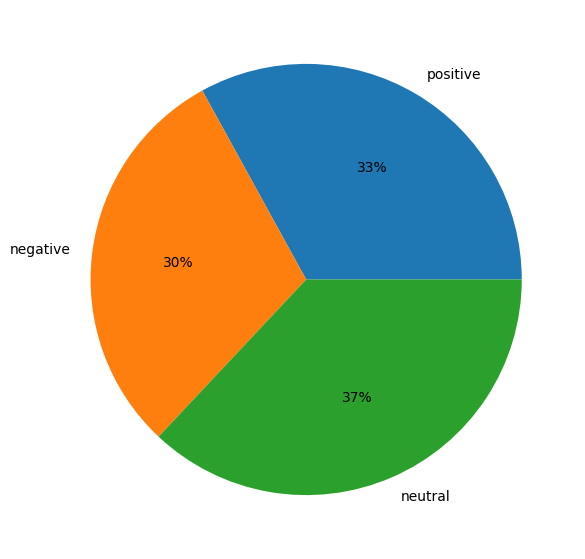

In [6]:
from matplotlib import pyplot as plt
import numpy as np
labels = ['positive','negative','neutral']
data =  [positive_rates['train'], negative_rates['train'], neutral_rates['train']]
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%')
print('График тренировочной выборки')
plt.show()
data =  [positive_rates['validation'], negative_rates['validation'], neutral_rates['validation']]
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%')
print('График проверочной  выборки')
plt.show()
print('График тестовой  выборки')
data =  [positive_rates['test'], negative_rates['test'], neutral_rates['test']]
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%')
plt.show()

In [7]:
# Задание 2
# Загрузка spaCy
import spacy

# Загрузка библиотеки для визуализации spaCy
from spacy import displacy

# Инициализация инструментов SpaCy для английского (для каждого языка загружается свой вариант)
nlp = spacy.load('en_core_web_sm')

# Выведем доступные инструменты
print(nlp.pipe_names)

# Образец текста из нашего датасета
sample = dataset['train'][0]['text']
sample

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


'Cooking microwave pizzas, yummy'

In [8]:
# Для работы со SpaCy, _нужно_ привести все к нужному виду
# Для этого загружаем в nlp наш текст
doc = nlp(sample)
doc # Визуально ничего не изменилось, но теперь это объект класса SpaCy, который можно обработать инструментами NLP

Cooking microwave pizzas, yummy

In [9]:
for token in doc:
    print(token.text)

Cooking
microwave
pizzas
,
yummy


In [10]:
for token in doc:
    print(token.pos_)

VERB
NOUN
NOUN
PUNCT
ADJ


In [11]:
for token in doc:
    print(token.tag_)

VBG
NN
NNS
,
JJ


In [12]:
for token in doc:
    print(token.dep_)

amod
compound
ROOT
punct
amod


In [13]:
for token in doc:
    print(token.morph)

Aspect=Prog|Tense=Pres|VerbForm=Part
Number=Sing
Number=Plur
PunctType=Comm
Degree=Pos


In [14]:
# Сохраним в отдельную переменную список текстов из тестовой выборки
texts = dataset['test'][0:5]['text'] # Выведите первые 5 текстов
print(texts) 
texts = dataset['test'][0:100]['text']

['getting cds ready for tour', ' MC, happy mother`s day to your mom ;).. love yah', 'A year from now is graduation....i am pretty sure i`m not ready for it!?!?!?', ' because you had chips and sale w/o me', 'Great for organising my work life balance']


In [15]:
texts_tokens = [] # Создадим список токенов для каждого текста с помощью SpaCy

for text in texts: 
    doc = nlp(text) # вызываем nlp для каждого текста
    text_tokens = [] #  токены кокретного текста

    for token in doc: # переклыдываем токены в коллекцию
        text_tokens.append(token) 
    texts_tokens.append(text_tokens)# каждый список токенов перекладываем в итогой список     

In [16]:
print(texts_tokens)

[[getting, cds, ready, for, tour], [ , MC, ,, happy, mother`s, day, to, your, mom, ;), .., love, yah], [A, year, from, now, is, graduation, ...., i, am, pretty, sure, i`m, not, ready, for, it, !, ?, !, ?, !, ?], [ , because, you, had, chips, and, sale, w/o, me], [Great, for, organising, my, work, life, balance], [ , its, my, going, away, partyyy,  , `, s.,  , you, should, come, !], [Is, Watching, Britains, Got, Talent, ,, &, Is, biting, her, nails, ., Please, don`t, come, off, black, nail, varnish], [ , remember, the, guy, who, 1st, #, tweetbud, you, !, ~, >, _, 2890,  , help, him, get, 900, flwrs, &, make, him, smile, !], [ , She, !, Maybe, that, was, our, first, mistake, .,  , Not, everyone, is, as, cool, as,   , (, brown, nose, moment, )], [today, i, was, so, happy, got, i, got, off, school, early, ,, but, now, i`m, bored, !, !], [ , but, but, it, was, funny, when, I, wrote, it], [ , I, saw, an, all, red, Audi, on, the, highway, ., I, sped, uo, to, it, hoping, it, was, you, ., My, l

In [17]:
tokens_positions = [] # создаём ОБЩИЙ список списков частей речи для КАЖДОГО текста

for text_tokens in texts_tokens: # итерируемся в цикле по каждому списку токенов
    token_positions = [] # создаём список частей речи для КОНКРЕТНОГО текста
    
    for token in text_tokens: # идём в цикле по токенам КОНКРЕТНОГО текста
        token_positions.append(token.pos_) # кладём ЧР в список частей речи КОНКРЕТНОГО текста
    tokens_positions.append(token_positions)

print(tokens_positions)

[['VERB', 'NOUN', 'ADJ', 'ADP', 'NOUN'], ['SPACE', 'PROPN', 'PUNCT', 'ADJ', 'PROPN', 'NOUN', 'ADP', 'PRON', 'NOUN', 'PUNCT', 'PUNCT', 'VERB', 'INTJ'], ['DET', 'NOUN', 'ADP', 'ADV', 'AUX', 'NOUN', 'PUNCT', 'PRON', 'AUX', 'ADV', 'ADJ', 'PROPN', 'PART', 'ADJ', 'ADP', 'PRON', 'PUNCT', 'PUNCT', 'PUNCT', 'PUNCT', 'PUNCT', 'PUNCT'], ['SPACE', 'SCONJ', 'PRON', 'VERB', 'NOUN', 'CCONJ', 'NOUN', 'ADP', 'PRON'], ['ADJ', 'ADP', 'VERB', 'PRON', 'NOUN', 'NOUN', 'NOUN'], ['SPACE', 'PRON', 'PRON', 'VERB', 'ADV', 'NOUN', 'SPACE', 'PUNCT', 'PROPN', 'SPACE', 'PRON', 'AUX', 'VERB', 'PUNCT'], ['AUX', 'PROPN', 'PROPN', 'PROPN', 'PROPN', 'PUNCT', 'CCONJ', 'AUX', 'VERB', 'PRON', 'NOUN', 'PUNCT', 'INTJ', 'INTJ', 'VERB', 'ADP', 'ADJ', 'NOUN', 'NOUN'], ['SPACE', 'VERB', 'DET', 'NOUN', 'PRON', 'NOUN', 'SYM', 'VERB', 'PRON', 'PUNCT', 'PUNCT', 'X', 'PUNCT', 'NUM', 'SPACE', 'VERB', 'PRON', 'VERB', 'NUM', 'NOUN', 'CCONJ', 'VERB', 'PRON', 'VERB', 'PUNCT'], ['SPACE', 'PRON', 'PUNCT', 'ADV', 'PRON', 'AUX', 'PRON', 'ADJ',

In [29]:
# Задание 4 
for i in range(len(texts_tokens)):

    print(f'Text: {i}')
    len_text = len(texts_tokens[i])
    
    for j in range(len_text):
        print(texts_tokens[i][j], tokens_positions[i][j]) 
        
    print()  

Text: 0
getting VERB
cds NOUN
ready ADJ
for ADP
tour NOUN

Text: 1
  SPACE
MC PROPN
, PUNCT
happy ADJ
mother`s PROPN
day NOUN
to ADP
your PRON
mom NOUN
;) PUNCT
.. PUNCT
love VERB
yah INTJ

Text: 2
A DET
year NOUN
from ADP
now ADV
is AUX
graduation NOUN
.... PUNCT
i PRON
am AUX
pretty ADV
sure ADJ
i`m PROPN
not PART
ready ADJ
for ADP
it PRON
! PUNCT
? PUNCT
! PUNCT
? PUNCT
! PUNCT
? PUNCT

Text: 3
  SPACE
because SCONJ
you PRON
had VERB
chips NOUN
and CCONJ
sale NOUN
w/o ADP
me PRON

Text: 4
Great ADJ
for ADP
organising VERB
my PRON
work NOUN
life NOUN
balance NOUN

Text: 5
  SPACE
its PRON
my PRON
going VERB
away ADV
partyyy NOUN
  SPACE
` PUNCT
s. PROPN
  SPACE
you PRON
should AUX
come VERB
! PUNCT

Text: 6
Is AUX
Watching PROPN
Britains PROPN
Got PROPN
Talent PROPN
, PUNCT
& CCONJ
Is AUX
biting VERB
her PRON
nails NOUN
. PUNCT
Please INTJ
don`t INTJ
come VERB
off ADP
black ADJ
nail NOUN
varnish NOUN

Text: 7
  SPACE
remember VERB
the DET
guy NOUN
who PRON
1st NOUN
# SYM
tweetbud VER

In [33]:
# Разметка именованных сущностей
for text in texts[7:19]:
    doc = nlp(text)
    print([(ent, ent.label_) for ent in doc.ents]) # Выведем именованную сущность и ее лейбл

[(tweetbud, 'PERSON'), (2890, 'CARDINAL')]
[(first, 'ORDINAL')]
[(today, 'DATE'), (i`m, 'NORP')]
[]
[(Audi, 'PRODUCT')]
[]
[]
[]
[]
[]
[(TY, 'ORG')]
[(recent years, 'DATE')]


In [40]:
displacy.render(nlp(texts[61]), style="ent", jupyter=True)